We build a classifier based on CNN to recognize hand-written digits 0-9. We are using the mnist
(Modified National Institute of Standards and Technology) dataset, which can be loaded:
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()
It contains black-white images (28 x 28 pixels) and their labels of hand-written digit (60000 in training set and 10000 in test set).

In [234]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-03-02 16:22:35.060524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [235]:
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## 1. Plot first 9 images:

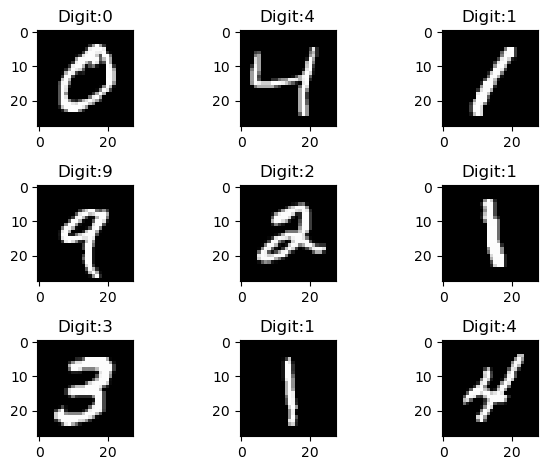

In [253]:
fig, axs = plt.subplots(3, 3)

for r in range(0, 3):
    for c in range(0, 3):
        num = r*3+1+c
        axs[r, c].imshow(train_digits[num], cmap='gray')
        axs[r, c].set_title('Digit:'+str(train_labels[num]))

plt.tight_layout()
plt.show()

## 2. Prepare the data

In [254]:
train_digits = train_digits.reshape(60000,28,28,1)
# one-hot ecoded for labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)

In [257]:
test_digits = test_digits.reshape(10000,28,28,1)
# one-hot ecoded for labels
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## 3. Build your CNN model with Conv2D with (3, 3) filters and MaxPooling2D((2, 2)). Show the summary of your model. 

In [340]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.3))


In [341]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [342]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_36 (Dense)            (None, 64)              

## 4. Compile and train your model. Consider the choices of optimizer, loss, and epochs. What are your accuracy and val_accuracy?

In [347]:
model.compile(optimizer='adam',
              # as the labels are one-hot encoded, use categorical_crossentropy, not SparseCategoricalCrossentropy
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

history = model.fit(train_digits, train_labels, epochs=5, 
                    validation_data=(test_digits, test_labels))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0449 - val_accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0341 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0390 - val_accuracy: 0.9904


In [349]:
history.history['accuracy']

[0.9819666743278503,
 0.9879999756813049,
 0.9890000224113464,
 0.9912499785423279,
 0.9926833510398865]

## 5. Plot the history of model training against epoch.

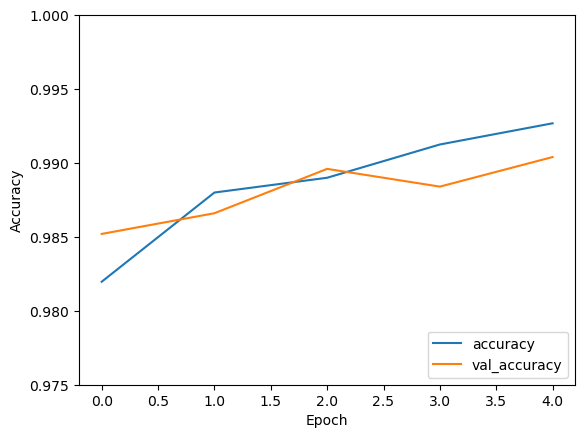

In [355]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.975, 1])
plt.legend(loc='lower right')

## 6. Evaluate the model with the test data.

In [354]:
test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0390 - accuracy: 0.9904 - 875ms/epoch - 3ms/step
